In [1]:
import numpy as np

In [2]:
import sys
sys.path.append("..") # Adds higher directory to python modules path.

In [3]:
import matplotlib.pyplot as plt

In [4]:
from cpmix_utils import weight_fun, calc_weights, calc_min_distances_continuous,calc_min_distances_discrete, calculate_metrics

In [5]:
calc_popts = np.load('../monit_npy/nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_21/regression_calc_popts.npy')

In [6]:
pred_popts = np.load('../monit_npy/nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_21/regression_preds_popts.npy')

In [7]:
calc_popts.shape

(100000, 3)

In [8]:
def calculate_classes_weights(num_classes, popts):
    classes = np.linspace(0, 2, num_classes) * np.pi
    data_len = popts.shape[0]
    return calc_weights(classes, popts, data_len, num_classes)

In [9]:
metrics = [calculate_metrics(i+2, calculate_classes_weights(i+2, calc_popts), calculate_classes_weights(i+2, pred_popts)) for i in range(49)]

In [10]:
metrics = np.stack(metrics)

In [11]:
np.save( 'metrics_popts.npy', metrics,)

# Accuracy

Text(0,0.5,'Accuracy')

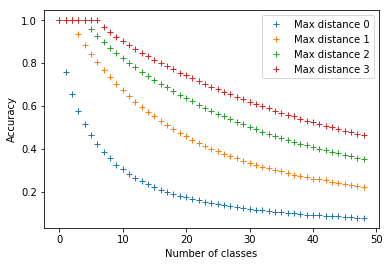

In [12]:
plt.plot(metrics[:, 0],'+', label='Max distance 0')
plt.plot(metrics[:, 1],'+', label='Max distance 1')
plt.plot(metrics[:, 2],'+', label='Max distance 2')
plt.plot(metrics[:, 3],'+', label='Max distance 3')
plt.legend(loc='upper right')
plt.xlabel('Number of classes')
plt.ylabel('Accuracy')


# L1 Distance

Text(0,0.5,'l1')

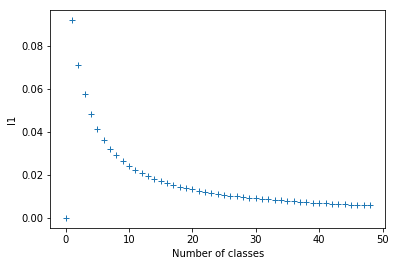

In [13]:
plt.plot(metrics[:, 5], '+')
plt.xlabel("Number of classes")
plt.ylabel('l1')

# L2 distance

Text(0,0.5,'l2')

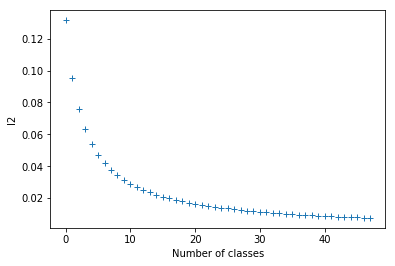

In [14]:
plt.plot(metrics[1:, 6], '+')
plt.xlabel("Number of classes")
plt.ylabel('l2')

In [15]:
def plot_distr(num_class, calc_popts, pred_popts):

    calc_w = calculate_classes_weights(num_class, calc_popts)
    preds_w = calculate_classes_weights(num_class, pred_popts)
    pred_arg_maxs = np.argmax(preds_w, axis=1)
    calc_arg_maxs = np.argmax(calc_w, axis=1)
    
    min_distances = calc_min_distances_discrete(pred_arg_maxs, calc_arg_maxs, num_class)
    
    bins = list(range(int(np.min(min_distances)), int(np.max(min_distances)+2)))
    plt.hist(min_distances, bins=bins, histtype='step')
    plt.xlabel('Prediction error distance')
    

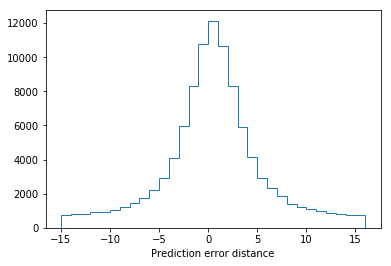

In [16]:
i = 32
plot_distr(i, calc_popts, pred_popts)

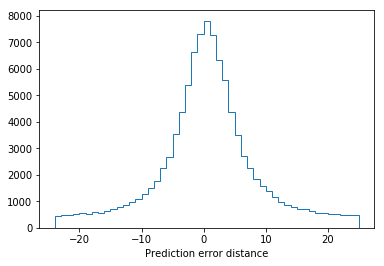

In [17]:
i = 50
plot_distr(i, calc_popts, pred_popts)

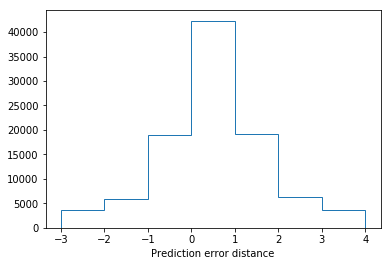

In [18]:
i = 8
plot_distr(i, calc_popts, pred_popts)

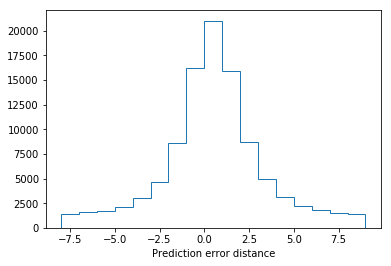

In [19]:
i = 18
plot_distr(i, calc_popts, pred_popts)

# plots

## Comment:
It may look like that "calc_popts" and "pred_popts" have different relative normalisation. But it is not true. Calc_popts and pred_popts are not normalized anywhere.

In [20]:
xs = np.linspace(0, 2*np.pi, 100)

In [21]:
from scipy import integrate

def show_plots(i, normalize=False):
    y_calc = weight_fun(xs, *calc_popts[i])
    y_pred = weight_fun(xs, *pred_popts[i])
    a_calc = calc_popts[i][0]
    a_pred = pred_popts[i][0]
    if normalize:
        y_calc /= 2*np.pi*a_calc
        y_pred /= 2*np.pi*a_pred
        a_pred /= 2*np.pi*a_pred
        a_calc /= 2*np.pi*a_calc
    plt.plot(xs, y_calc)
    plt.plot(xs, y_pred)
    plt.xlabel("Mixing angle")
    print('Num integral calc: ', integrate.simps(y_calc, xs)) # numerical Integral (check if it is correct)
    print('Analitical integral calc: ', 2*np.pi*a_calc)
    print('Num integral pred: ', integrate.simps(y_pred, xs))
    print('Analitical integral pred: ', 2*np.pi*a_pred)

Num integral calc:  5.1396092837064575
Analitical integral calc:  5.139606489495202
Num integral pred:  8.445084753749848
Analitical integral pred:  8.445086300107894


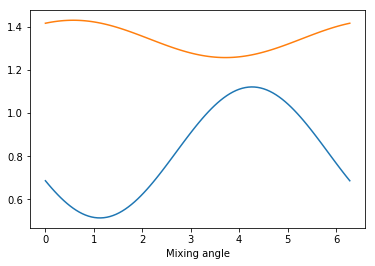

In [22]:
i=100
show_plots(i)

Num integral calc:  1.0000005436624888
Analitical integral calc:  1.0
Num integral pred:  0.9999998168925702
Analitical integral pred:  1.0


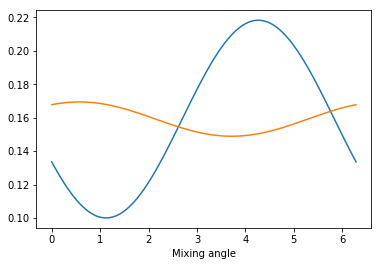

In [23]:
show_plots(i, True)

Num integral calc:  8.6845966673628
Analitical integral calc:  8.684593723806925
Num integral pred:  9.460967243732776
Analitical integral pred:  9.460965825899217


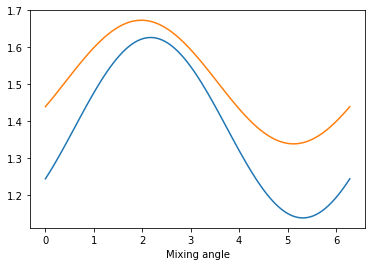

In [24]:
i=200
show_plots(i)

Num integral calc:  1.000000338939963
Analitical integral calc:  1.0
Num integral pred:  1.0000001498613973
Analitical integral pred:  0.9999999999999999


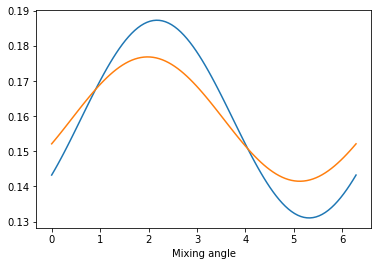

In [25]:
i=200
show_plots(i, True)

Num integral calc:  2.014136260809972
Analitical integral calc:  2.0141427059974037
Num integral pred:  6.325045694343108
Analitical integral pred:  6.325052945900506


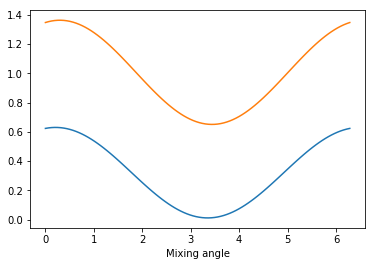

In [26]:
i=300
show_plots(i)

Num integral calc:  0.9999968000343706
Analitical integral calc:  1.0
Num integral pred:  0.9999988535183088
Analitical integral pred:  1.0


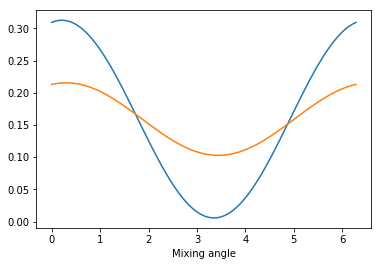

In [27]:
i=300
show_plots(i, True)

Num integral calc:  7.052521266868879
Analitical integral calc:  7.052510456564186
Num integral pred:  6.0190458147605375
Analitical integral pred:  6.019042878575764


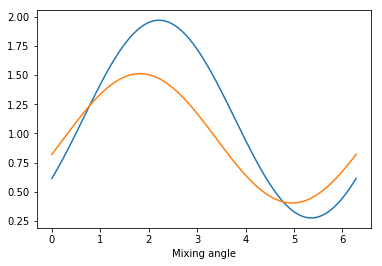

In [28]:
i=400
show_plots(i)

Num integral calc:  1.0000015328307217
Analitical integral calc:  1.0
Num integral pred:  1.0000004878158928
Analitical integral pred:  0.9999999999999999


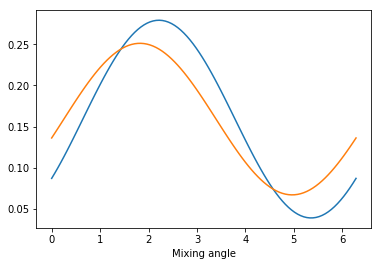

In [29]:
i=400
show_plots(i, True)

# Distance between maximums

In [30]:
from scipy.optimize import fminbound

In [31]:
fminbound(lambda x: -weight_fun(x, *calc_popts[400]), x1=0, x2=2*np.pi)

2.2139767136732376

In [32]:
max_calc = np.array([fminbound(lambda x: -weight_fun(x, *popt), x1=0, x2=2*np.pi) for popt in calc_popts])

In [33]:
max_pred = np.array([fminbound(lambda x: -weight_fun(x, *popt), x1=0, x2=2*np.pi) for popt in pred_popts])

In [34]:
min_distances = calc_min_distances_continuous(max_pred, max_calc)

In [35]:
np.mean(np.abs(max_calc-max_pred))

1.18067735341287

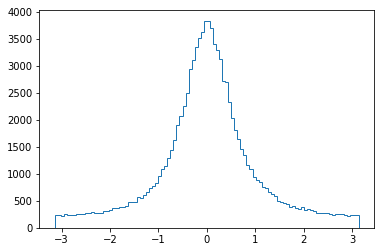

In [36]:
a=plt.hist(min_distances,histtype='step', bins=100)

# Distance between maximums - calculated using other method - for comparison

In [37]:
from cpmix_utils import calc_arg_maxs

In [38]:
max_calc = calc_arg_maxs(calc_popts, calc_popts.shape[0])

In [39]:
calc_popts.shape

(100000, 3)

In [40]:
max_pred = calc_arg_maxs(pred_popts, pred_popts.shape[0])

In [41]:
min_distances = calc_min_distances_continuous(max_pred, max_calc)

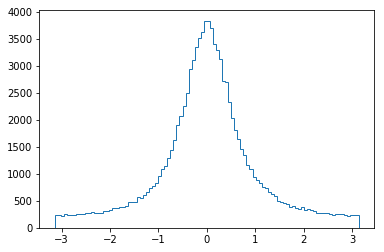

In [42]:
h =plt.hist(min_distances,histtype='step', bins=100)

# Find peak and its half-width 

In [43]:
y, bins, _ = h

In [44]:
bins.shape


(101,)

In [45]:
y.shape

(100,)

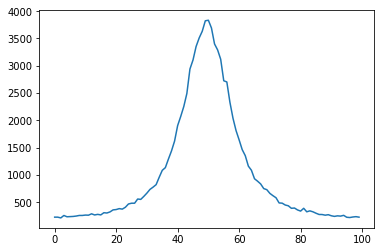

In [46]:
plt.plot(y)

In [47]:
from scipy.signal import find_peaks

In [48]:
peak_bin, info =  find_peaks(y, width=5, rel_height=0.5)

In [49]:
alpha = bins[1]-bins[0] # bins width is constant

In [50]:
width = alpha*info['widths'][0] # measured at half the prominence height; in radians units

In [51]:

print("Peak is in range: ", bins[peak_bin[0]], bins[peak_bin[0]+1])
print("Peak half-width is: ", width) 

Peak is in range:  -0.00029544382955126736 0.06252920243156534
Peak half-width is:  1.088219192545106


In [52]:
info

{'prominences': array([3611.]),
 'left_bases': array([2]),
 'right_bases': array([96]),
 'widths': array([17.32153315]),
 'width_heights': array([2028.5]),
 'left_ips': array([40.73353293]),
 'right_ips': array([58.05506608])}

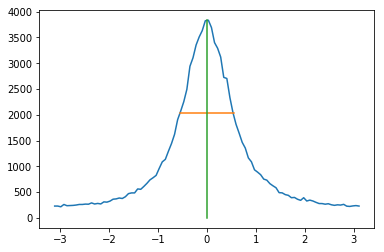

In [53]:
peak_middle = (bins[peak_bin[0]] +  bins[peak_bin[0]+1])/2*alpha

plt.plot(bins[:-1]+alpha/2, y)
plt.plot([peak_middle-width/2, peak_middle+width/2], [info['width_heights'][0], info['width_heights'][0]]) # half width line
plt.plot([peak_middle, peak_middle], [0, max(y)])